In [52]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Step 1: Load the Dataset and Examine its Basic Structure**

In [53]:
import pandas as pd

In [54]:
data = pd.read_csv('/content/gdrive/MyDrive/Datasets/House Prices Training Data.csv')

In [55]:
# Display the first few rows of the dataset
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Step 2: Analyze and Preprocess the Data**

**Checking for Missing Data**

In [56]:
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

**Handling Missing Data**

In [57]:
# Replacing NaN with "None" for certain columns
cols_replace_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                     'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                     'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType']
for col in cols_replace_none:
    data[col].fillna("None", inplace=True)

In [58]:
# Replacing NaN with 0 for certain columns
cols_replace_zero = ['GarageYrBlt', 'MasVnrArea']
for col in cols_replace_zero:
    data[col].fillna(0, inplace=True)

In [59]:
# Imputing with median for LotFrontage
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)

In [60]:
# Imputing with mode for Electrical
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)

In [61]:
# Check if there are any missing values left
remaining_missing = data.isnull().sum().max()
remaining_missing

0

**Basic Statistical Analysis**

In [62]:
# Get descriptive statistics for numeric columns
descriptive_stats = data.describe()

descriptive_stats

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Step 3: Visualizing the Data**

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Set the style of the visualization
sns.set_style("whitegrid")

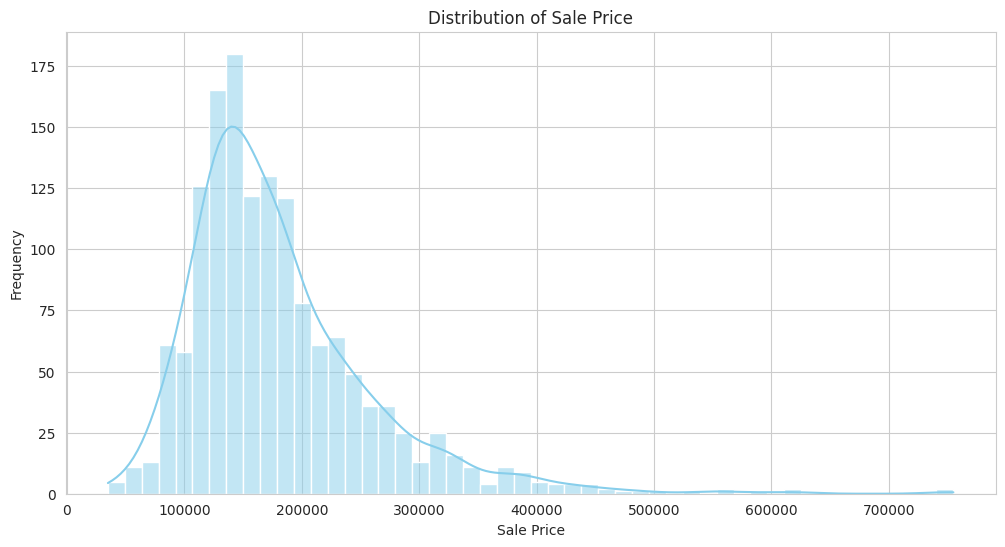

In [65]:
# Create a histogram for Sale Price
plt.figure(figsize=(12, 6))
sns.histplot(data['SalePrice'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

<ipython-input-66-44548e532623>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


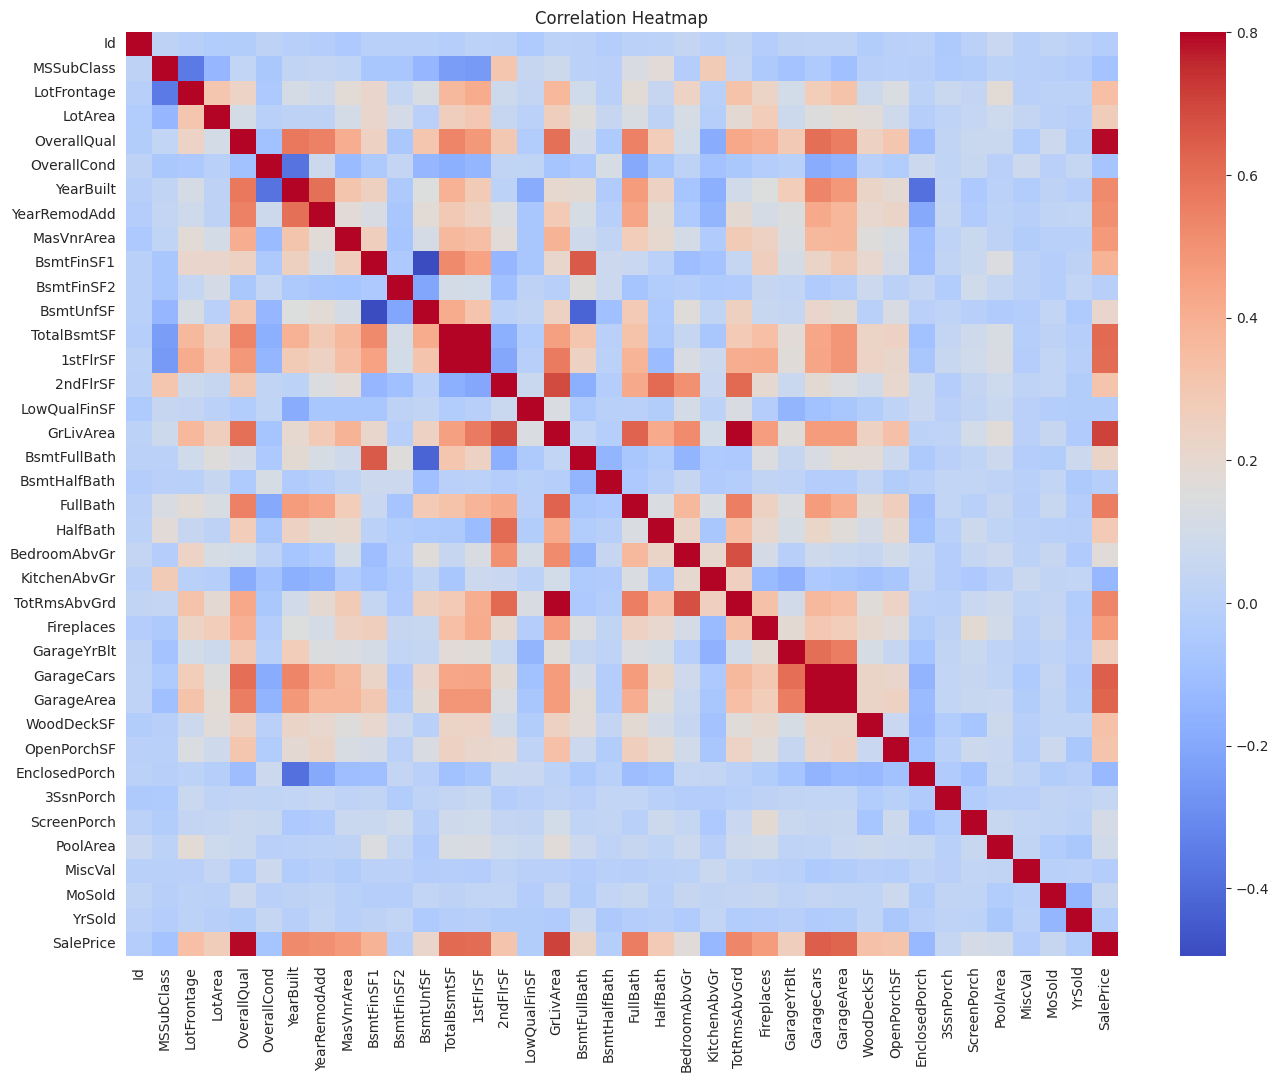

In [66]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Generate a heatmap of the correlation
sns.heatmap(corr_matrix, cmap="coolwarm", vmax=0.8)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

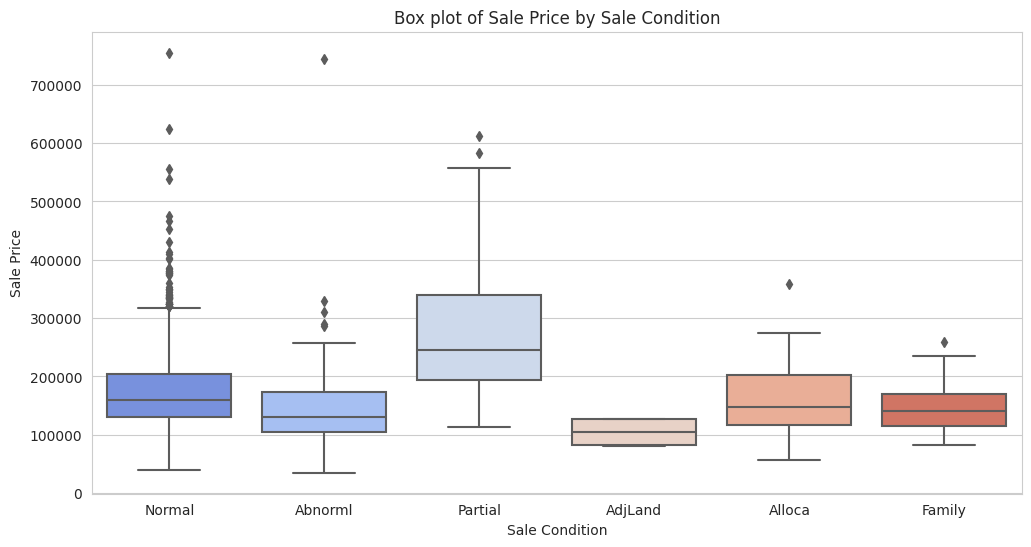

In [67]:
# Create a box plot for SaleCondition vs SalePrice
plt.figure(figsize=(12, 6))
sns.boxplot(x='SaleCondition', y='SalePrice', data=data, palette="coolwarm")
plt.title('Box plot of Sale Price by Sale Condition')
plt.xlabel('Sale Condition')
plt.ylabel('Sale Price')
plt.show()

**Step 4: Building Interactive Visualizations using D3.js**

In [77]:
# Calculate average SalePrice for each SaleCondition
avg_saleprice_by_condition = data.groupby('SaleCondition')['SalePrice'].mean().reset_index()

In [98]:
# Select data for scatter plot
scatter_data = data[['GrLivArea', 'SalePrice']]

In [79]:
avg_saleprice_by_condition, scatter_data.head()

(  SaleCondition      SalePrice
 0       Abnorml  146526.623762
 1       AdjLand  104125.000000
 2        Alloca  167377.416667
 3        Family  149600.000000
 4        Normal  175202.219533
 5       Partial  272291.752000,
    GrLivArea  SalePrice
 0       1710     208500
 1       1262     181500
 2       1786     223500
 3       1717     140000
 4       2198     250000)

In [99]:
scatter_data = scatter_data.to_json(orient='records')
print(scatter_data)

[{"GrLivArea":1710,"SalePrice":208500},{"GrLivArea":1262,"SalePrice":181500},{"GrLivArea":1786,"SalePrice":223500},{"GrLivArea":1717,"SalePrice":140000},{"GrLivArea":2198,"SalePrice":250000},{"GrLivArea":1362,"SalePrice":143000},{"GrLivArea":1694,"SalePrice":307000},{"GrLivArea":2090,"SalePrice":200000},{"GrLivArea":1774,"SalePrice":129900},{"GrLivArea":1077,"SalePrice":118000},{"GrLivArea":1040,"SalePrice":129500},{"GrLivArea":2324,"SalePrice":345000},{"GrLivArea":912,"SalePrice":144000},{"GrLivArea":1494,"SalePrice":279500},{"GrLivArea":1253,"SalePrice":157000},{"GrLivArea":854,"SalePrice":132000},{"GrLivArea":1004,"SalePrice":149000},{"GrLivArea":1296,"SalePrice":90000},{"GrLivArea":1114,"SalePrice":159000},{"GrLivArea":1339,"SalePrice":139000},{"GrLivArea":2376,"SalePrice":325300},{"GrLivArea":1108,"SalePrice":139400},{"GrLivArea":1795,"SalePrice":230000},{"GrLivArea":1060,"SalePrice":129900},{"GrLivArea":1060,"SalePrice":154000},{"GrLivArea":1600,"SalePrice":256300},{"GrLivArea":9

In [92]:
avg_saleprice_by_condition = avg_saleprice_by_condition.to_json(orient='records')
print(avg_saleprice_by_condition)

[{"SaleCondition":"Abnorml","SalePrice":146526.6237623762},{"SaleCondition":"AdjLand","SalePrice":104125.0},{"SaleCondition":"Alloca","SalePrice":167377.4166666667},{"SaleCondition":"Family","SalePrice":149600.0},{"SaleCondition":"Normal","SalePrice":175202.2195325543},{"SaleCondition":"Partial","SalePrice":272291.752}]


In [96]:
from IPython.core.display import display, HTML

html_content = """
<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>D3 Visualizations</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            margin: 40px;
        }}

        h1 {{
            text-align: center;
            color: #333;
        }}

        /* Style for the charts */
        #chart1,
        #chart2 {{
            margin-top: 40px;
            margin-bottom: 60px;
        }}

        .bar {{
            fill: skyblue;
        }}

        .dot {{
            fill: red;
        }}
    </style>
</head>

<body>
    <h1>Data Visualizations</h1>
    <div>
      <span id="chart1"></span>
    <span id="chart2"></span>
    </div>

    <!-- D3.js Library -->
    <script src="https://d3js.org/d3.v7.min.js"></script>

    <script>
        // Inline JavaScript Variables
        const avgSalePriceData = {avg_saleprice_by_condition};
        const scatterData = {scatter_data};

        // Bar Chart: SaleCondition vs. Average SalePrice
        {{
            const margin = {{ top: 20, right: 20, bottom: 60, left: 60 }},
                width = 600 - margin.left - margin.right,
                height = 400 - margin.top - margin.bottom;

            const svg = d3.select("#chart1")
                .append("svg")
                .attr("width", width + margin.left + margin.right)
                .attr("height", height + margin.top + margin.bottom)
                .append("g")
                .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

            const x = d3.scaleBand().range([0, width]).padding(0.4);
            const y = d3.scaleLinear().range([height, 0]);

            x.domain(avgSalePriceData.map(d => d.SaleCondition));
            y.domain([0, d3.max(avgSalePriceData, d => d.SalePrice)]);

            svg.append("g")
                .attr("transform", "translate(0," + height + ")")
                .call(d3.axisBottom(x));

            svg.append("g")
                .call(d3.axisLeft(y));

            svg.selectAll(".bar")
                .data(avgSalePriceData)
                .enter().append("rect")
                .attr("class", "bar")
                .attr("x", d => x(d.SaleCondition))
                .attr("y", d => y(d.SalePrice))
                .attr("width", x.bandwidth())
                .attr("height", d => height - y(d.SalePrice));
        }}

        // Scatter Plot: GrLivArea vs. SalePrice
        {{
            const margin = {{ top: 20, right: 20, bottom: 60, left: 60 }},
                width = 600 - margin.left - margin.right,
                height = 400 - margin.top - margin.bottom;

            const svg = d3.select("#chart2")
                .append("svg")
                .attr("width", width + margin.left + margin.right)
                .attr("height", height + margin.top + margin.bottom)
                .append("g")
                .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

            const x = d3.scaleLinear().range([0, width]);
            const y = d3.scaleLinear().range([height, 0]);

            x.domain([0, d3.max(scatterData, d => +d.GrLivArea)]);
            y.domain([0, d3.max(scatterData, d => +d.SalePrice)]);

            svg.append("g")
                .attr("transform", "translate(0," + height + ")")
                .call(d3.axisBottom(x));

            svg.append("g")
                .call(d3.axisLeft(y));

            svg.selectAll(".dot")
                .data(scatterData)
                .enter().append("circle")
                .attr("class", "dot")
                .attr("cx", d => x(+d.GrLivArea))
                .attr("cy", d => y(+d.SalePrice))
                .attr("r", 3);
        }}
    </script>
</body>

</html>
"""

In [97]:
import base64
html_content_updated = html_content.format(avg_saleprice_by_condition=avg_saleprice_by_condition,
                                           scatter_data=scatter_data)

encoded = base64.b64encode(html_content_updated.encode()).decode('utf-8')
iframe_code = f'<iframe src="data:text/html;base64,{encoded}" width="800" height="600"></iframe>'
display(HTML(iframe_code))